# *Date a Cientist*

Main goal: Create machine learning models to make a prediction about relationship app users. In the real world, the app uses predictions like this to estimate compatibility among users and then suggest matches. The specific goal here is to compare and contrast the performance of supervised machine learning models to predict the religious preference of users based on other aspects of their profiles. A supplemental -learning- exercise is to see whether a natural language processing model can predict which user wrote a very brief essay.

## In this project i will analyse a dataset with some tools like NLP and Machine Learning Models
### For this project i used:
- Matplotlib
- Pandas
- NumPy
- Sklearn library
- KMeans classifier
- Logistic Regression classifier
- Decision Tree classifier
- Random Forest classifier
- Confusion Matrix
- Scipy Stats

With the analytics from the various columns that we have we could to get some insights to every aspect that we need

In [249]:
# importing the libraries that i will use at this project
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from scipy.stats import chi2_contingency
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, PrecisionRecallDisplay
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [199]:
# loading the dataset
df = pd.read_csv('profiles.csv', header=0)

### Let's see what we got at this dataset

In [256]:
print(df.head(), '\n')
print(df.dtypes, '\n')
print(df.columns)

   age       body_type               diet    drinks      drugs  \
0   22  a little extra  strictly anything  socially      never   
1   35         average       mostly other     often  sometimes   
2   38            thin           anything  socially        NaN   
3   23            thin         vegetarian  socially        NaN   
4   29        athletic                NaN  socially      never   

                           education  \
0      working on college/university   
1              working on space camp   
2     graduated from masters program   
3      working on college/university   
4  graduated from college/university   

                                              essay0  \
0  about me:<br />\n<br />\ni would love to think...   
1  i am a chef: this is what that means.<br />\n1...   
2  i'm not ashamed of much, but writing public te...   
3          i work in a library and go to school. . .   
4  hey how's it going? currently vague on the pro...   

                         

### Exploring the data

I'll check the quantity of categories each column have. This will be important to my next approach

In [201]:
df_cols = []
for column in df.columns:
    if df[column].dtypes == 'object':
        df_cols.append(column)
        print(f'Column {column.upper()} has {df[column].nunique()} categories')   

Column BODY_TYPE has 12 categories
Column DIET has 18 categories
Column DRINKS has 6 categories
Column DRUGS has 3 categories
Column EDUCATION has 32 categories
Column ESSAY0 has 54350 categories
Column ESSAY1 has 51516 categories
Column ESSAY2 has 48635 categories
Column ESSAY3 has 43533 categories
Column ESSAY4 has 49260 categories
Column ESSAY5 has 48963 categories
Column ESSAY6 has 43603 categories
Column ESSAY7 has 45554 categories
Column ESSAY8 has 39324 categories
Column ESSAY9 has 45443 categories
Column ETHNICITY has 217 categories
Column JOB has 21 categories
Column LAST_ONLINE has 30123 categories
Column LOCATION has 199 categories
Column OFFSPRING has 15 categories
Column ORIENTATION has 3 categories
Column PETS has 15 categories
Column RELIGION has 45 categories
Column SEX has 2 categories
Column SIGN has 48 categories
Column SMOKES has 5 categories
Column SPEAKS has 7647 categories
Column STATUS has 5 categories


### *Creating a function to count how many null values that we have*
Them the function will drop the NaN's value and print the quantity of drops

In [202]:
def clean_count_variables(column):
    before_clean = df[column].isnull().sum()
    clean_column = df[column].dropna()
    after_clean = len(df[column])
    col_entries = list(clean_column.unique())
    print('For column {}, {} entries remain after {} NaNs deleted'.format(column.upper(), after_clean, before_clean))
    print('The categories that have left over are:', '\n', sorted(col_entries), '\n')


### Body type
Using our function on body_type

In [203]:
clean_count_variables('body_type')

print(df.body_type.value_counts())

For column BODY_TYPE, 59946 entries remain after 5296 NaNs deleted
The categories that have left over are: 
 ['a little extra', 'athletic', 'average', 'curvy', 'fit', 'full figured', 'jacked', 'overweight', 'rather not say', 'skinny', 'thin', 'used up'] 

average           14652
fit               12711
athletic          11819
thin               4711
curvy              3924
a little extra     2629
skinny             1777
full figured       1009
overweight          444
jacked              421
used up             355
rather not say      198
Name: body_type, dtype: int64


### Diet
Using our function on diet

In [204]:
clean_count_variables('diet')

print(df.diet.value_counts())

For column DIET, 59946 entries remain after 24395 NaNs deleted
The categories that have left over are: 
 ['anything', 'halal', 'kosher', 'mostly anything', 'mostly halal', 'mostly kosher', 'mostly other', 'mostly vegan', 'mostly vegetarian', 'other', 'strictly anything', 'strictly halal', 'strictly kosher', 'strictly other', 'strictly vegan', 'strictly vegetarian', 'vegan', 'vegetarian'] 

mostly anything        16585
anything                6183
strictly anything       5113
mostly vegetarian       3444
mostly other            1007
strictly vegetarian      875
vegetarian               667
strictly other           452
mostly vegan             338
other                    331
strictly vegan           228
vegan                    136
mostly kosher             86
mostly halal              48
strictly halal            18
strictly kosher           18
halal                     11
kosher                    11
Name: diet, dtype: int64


### Drinks
Using our function on drinks

In [205]:
clean_count_variables('drinks')

print(df.drinks.value_counts())

For column DRINKS, 59946 entries remain after 2985 NaNs deleted
The categories that have left over are: 
 ['desperately', 'not at all', 'often', 'rarely', 'socially', 'very often'] 

socially       41780
rarely          5957
often           5164
not at all      3267
very often       471
desperately      322
Name: drinks, dtype: int64


### Drugs

In [206]:
clean_count_variables('drugs')

print(df.drugs.value_counts())

For column DRUGS, 59946 entries remain after 14080 NaNs deleted
The categories that have left over are: 
 ['never', 'often', 'sometimes'] 

never        37724
sometimes     7732
often          410
Name: drugs, dtype: int64


### Education

In [207]:
clean_count_variables('education')

print(df.education.value_counts())

For column EDUCATION, 59946 entries remain after 6628 NaNs deleted
The categories that have left over are: 
 ['college/university', 'dropped out of college/university', 'dropped out of high school', 'dropped out of law school', 'dropped out of masters program', 'dropped out of med school', 'dropped out of ph.d program', 'dropped out of space camp', 'dropped out of two-year college', 'graduated from college/university', 'graduated from high school', 'graduated from law school', 'graduated from masters program', 'graduated from med school', 'graduated from ph.d program', 'graduated from space camp', 'graduated from two-year college', 'high school', 'law school', 'masters program', 'med school', 'ph.d program', 'space camp', 'two-year college', 'working on college/university', 'working on high school', 'working on law school', 'working on masters program', 'working on med school', 'working on ph.d program', 'working on space camp', 'working on two-year college'] 

graduated from college/u

### Job

In [208]:
clean_count_variables('job')

print(df.job.value_counts())

For column JOB, 59946 entries remain after 8198 NaNs deleted
The categories that have left over are: 
 ['artistic / musical / writer', 'banking / financial / real estate', 'clerical / administrative', 'computer / hardware / software', 'construction / craftsmanship', 'education / academia', 'entertainment / media', 'executive / management', 'hospitality / travel', 'law / legal services', 'medicine / health', 'military', 'other', 'political / government', 'rather not say', 'retired', 'sales / marketing / biz dev', 'science / tech / engineering', 'student', 'transportation', 'unemployed'] 

other                                7589
student                              4882
science / tech / engineering         4848
computer / hardware / software       4709
artistic / musical / writer          4439
sales / marketing / biz dev          4391
medicine / health                    3680
education / academia                 3513
executive / management               2373
banking / financial / real 

### Location

In [209]:
# clean_count_variables('location')
# that variable dont have NaN's value

### Age

For column AGE, 59946 entries remain after 0 NaNs deleted
The categories that have left over are: 
 [18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 109, 110] 

count    59946.000000
mean        32.340290
std          9.452779
min         18.000000
25%         26.000000
50%         30.000000
75%         37.000000
max        110.000000
Name: age, dtype: float64


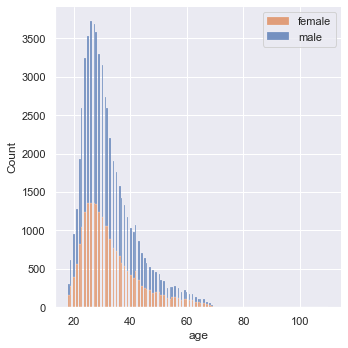

<Figure size 792x576 with 0 Axes>

In [210]:
clean_count_variables('age')

print(df.age.describe())

sns.set(rc={'figure.figsize':(11, 8)})
sns.displot(data=df, x='age', kind='hist', multiple='stack', hue='sex', legend=False)
plt.legend(['female', 'male'])
plt.show()
plt.clf()

### Income
Exploring the variable with our function 

For column INCOME, 59946 entries remain after 0 NaNs deleted
The categories that have left over are: 
 [-1, 20000, 30000, 40000, 50000, 60000, 70000, 80000, 100000, 150000, 250000, 500000, 1000000] 

The number of null values in the column "income" are 48442 or 80.81%
(11504, 31)
count      11504.000000
mean      104394.993046
std       201433.528307
min        20000.000000
25%        20000.000000
50%        50000.000000
75%       100000.000000
max      1000000.000000
Name: income, dtype: float64


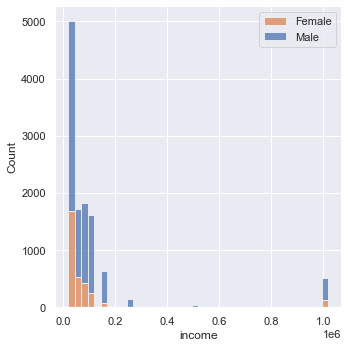

<Figure size 792x576 with 0 Axes>

In [211]:
clean_count_variables('income')
# As we can see we have the age -1, so -1 would be the NaN value, lets explore this

count_nulls_inc = (df[df['income'] == -1])['income'].count()
print(f'The number of null values in the column "income" are {count_nulls_inc} or {round((count_nulls_inc/len(df)*100),2)}%')

df_inc = df[df['income'] != -1]
print(df_inc.shape)
print(df_inc['income'].describe())

sns.set(rc={'figure.figsize':(11, 8)})
sns.displot(data=df_inc, x='income', hue='sex', kind='hist', binwidth = 25000, multiple='stack', legend=False)
plt.legend(['Female', 'Male'], loc='upper right')
plt.show()
plt.clf()

### *Age*

For column AGE, 59946 entries remain after 0 NaNs deleted
The categories that have left over are: 
 [18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 109, 110] 

count    59946.000000
mean        32.340290
std          9.452779
min         18.000000
25%         26.000000
50%         30.000000
75%         37.000000
max        110.000000
Name: age, dtype: float64 



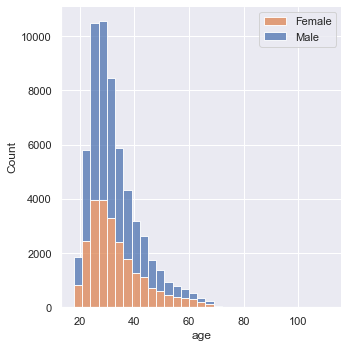

<Figure size 792x576 with 0 Axes>

In [212]:
clean_count_variables('age')

print(df.age.describe(), '\n')


sns.set(rc={'figure.figsize':(11, 8)})
sns.displot(data=df, x='age', kind='hist', binwidth=3, hue='sex', multiple='stack', legend=False)
plt.legend(['Female', 'Male'], loc='upper right')
plt.show()
plt.clf()


### *Sex*

For column SEX, 59946 entries remain after 0 NaNs deleted
The categories that have left over are: 
 ['f', 'm'] 

m    35829
f    24117
Name: sex, dtype: int64 



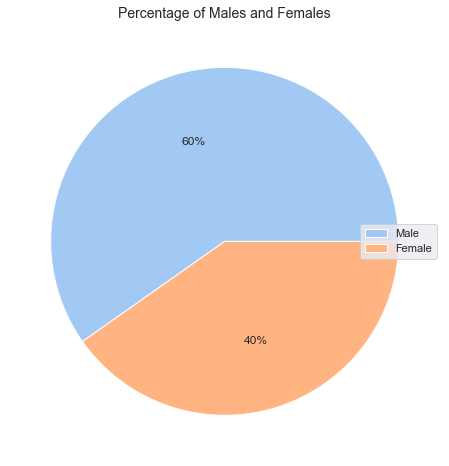

<Figure size 792x576 with 0 Axes>

In [213]:
clean_count_variables('sex')
print(df.sex.value_counts(), '\n')

color = sns.color_palette('pastel')[0:5]
plt.pie(df['sex'].value_counts(), autopct='%.0f%%', colors=color)
plt.title('Percentage of Males and Females', fontsize=14)
plt.legend(['Male', 'Female'], loc='right')
plt.show()
plt.clf()

### *Observations*
We have many variables with many columns that can reagrouped for clarity.
I think bag of words counter would be the best option to deal with this. 

- Using Chi-Square test to check if have association between the variables: `religion`, `drugs`, `drinks` and `smokes`

In [214]:
#droping the null values
df_religion = df.dropna(subset=['religion', 'drinks', 'drugs', 'smokes']).copy()
print('The new df_religion shape is:', df_religion.shape, '\n')

def check_text(string):
    if (string.__contains__('somewhat') | string.__contains__('very')):
        return True

df_religion['belief'] = df_religion.apply(lambda row: 'low belief' if check_text(row['religion']) else 'high belief', axis=1)

df_religion['religion'] = pd.Categorical(df_religion['religion'],\
                        ['agnosticism and laughing about it',  'agnosticism but not too serious about it', \
                         'agnosticism', 'agnosticism and somewhat serious about it', 'agnosticism and very serious about it', \
                         'atheism and laughing about it', 'atheism but not too serious about it', \
                         'atheism', 'atheism and somewhat serious about it', 'atheism and very serious about it',  \
                         'buddhism and laughing about it', 'buddhism but not too serious about it', \
                         'buddhism', 'buddhism and somewhat serious about it', 'buddhism and very serious about it', \
                         'catholicism and laughing about it', 'catholicism but not too serious about it', \
                         'catholicism', 'catholicism and somewhat serious about it', 'catholicism and very serious about it', \
                         'christianity and laughing about it', 'christianity but not too serious about it',\
                         'christianity', 'christianity and somewhat serious about it', 'christianity and very serious about it',\
                         'hinduism and laughing about it', 'hinduism but not too serious about it', \
                         'hinduism', 'hinduism and somewhat serious about it', 'hinduism and very serious about it', \
                         'islam and laughing about it', 'islam but not too serious about it', \
                         'islam', 'islam and somewhat serious about it', 'islam and very serious about it', \
                         'judaism and laughing about it', 'judaism but not too serious about it', \
                         'judaism', 'judaism and somewhat serious about it', 'judaism and very serious about it', \
                         'other and laughing about it', 'other but not too serious about it', \
                         'other', 'other and somewhat serious about it', 'other and very serious about it'], ordered=True)

df_religion['drugs'] = pd.Categorical(df_religion['drugs'], ['never', 'sometimes', 'often'], ordered=True)
df_religion['drinks'] = pd.Categorical(df_religion['drinks'], ['not at all', 'rarely', 'socially', 'often', 'very often', 'desperately'], ordered=True)
df_religion['smokes'] = pd.Categorical(df_religion['smokes'], ['no', 'sometimes', 'when drinking', 'trying to quit', 'yes'], ordered=True)

ab_contingency = pd.crosstab(df_religion['drugs'], df_religion['belief'])
print(ab_contingency)

chi2, pval, dof, expected = chi2_contingency(ab_contingency)
print(pval)

The new df_religion shape is: (30094, 31) 

belief     high belief  low belief
drugs                             
never            19802        4371
sometimes         4595        1033
often              208          85
8.965022305044359e-06


### As we expected p value suggests a correlation between these four variables.
- To testing i apply the model to the variables: `drugs` and `belief`

         belief  count    percent
0   agnosticism   6307  20.957666
1       atheism   4968  16.508274
2      buddhism   1464   4.864757
3   catholicism   3920  13.025852
4  christianity   4996  16.601316
5      hinduism    375   1.246096
6         islam    110   0.365521
7       judaism   2156   7.164219
8         other   5798  19.266299


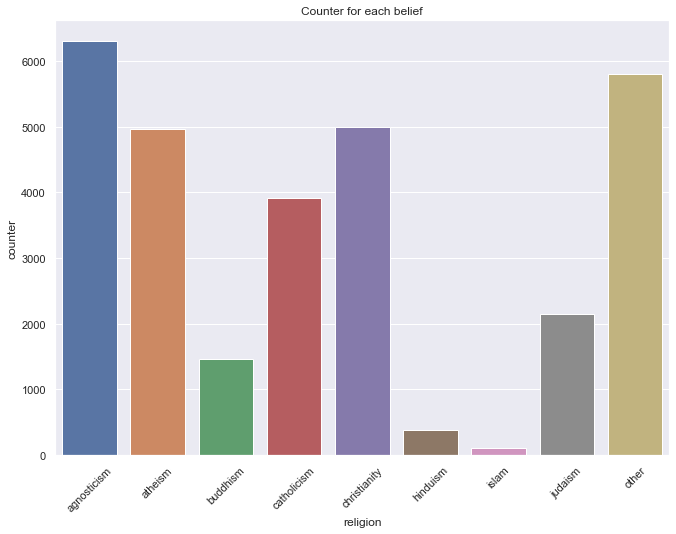

<Figure size 792x576 with 0 Axes>

In [215]:
# creating a counter for the each belief
df_religion['belief_overall'] = df_religion['religion'].str.split().str.get(0)
beliefs_overall = df_religion['belief_overall'].value_counts().sort_index().to_frame().reset_index()
beliefs_overall.columns = ['belief', 'count']
beliefs_overall['percent'] = beliefs_overall['count'].apply(lambda x: x / len(df_religion['belief_overall'])*100)

print(beliefs_overall)

sns.set(rc={'figure.figsize':(11, 8)})
sns.barplot(data=beliefs_overall, x='belief', y='count')
plt.title('Counter for each belief')
plt.xlabel('religion')
plt.xticks(rotation=45)
plt.ylabel('counter')

plt.show()
plt.clf()

### *Drug users*
- Now i will explore the drugs variable and calculate the percentage of drug users 

       index     drugs    percent
0      never  0.803250  80.324982
1  sometimes  0.187014  18.701402
2      often  0.009736   0.973616


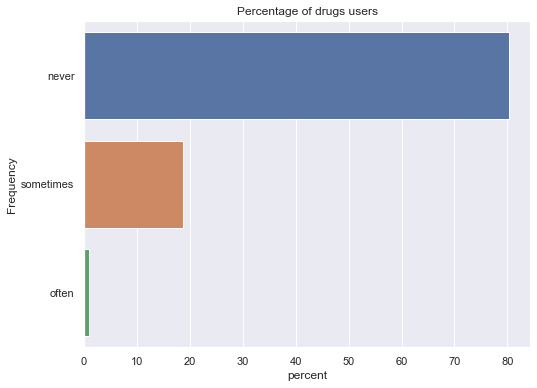

<Figure size 576x432 with 0 Axes>

In [216]:
drug_counter = df_religion['drugs'].value_counts(normalize=True).reset_index()
drug_counter['percent'] = drug_counter.apply(lambda x: x['drugs'] *100, axis=1)

print(drug_counter)

sns.set(rc={'figure.figsize':(8, 6)})
sns.barplot(data=drug_counter, x='percent', y='index')
plt.xlabel('percent')
plt.ylabel('Frequency')
plt.title('Percentage of drugs users')
plt.show()
plt.clf()

         index    drinks    percent
0     socially  0.691600  69.159965
1       rarely  0.127235  12.723466
2        often  0.088556   8.855586
3   not at all  0.077324   7.732438
4   very often  0.009603   0.960324
5  desperately  0.005682   0.568220


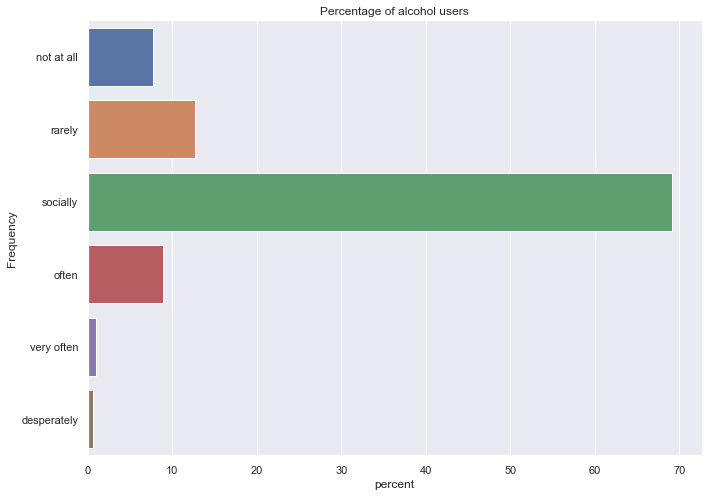

<Figure size 792x576 with 0 Axes>

In [217]:
drink_counter = df_religion['drinks'].value_counts(normalize=True).reset_index()
drink_counter['percent'] = drink_counter.apply(lambda x: x['drinks'] *100, axis=1)

print(drink_counter)

sns.set(rc={'figure.figsize':(11, 8)})
sns.barplot(data=drink_counter, x='percent', y='index')
plt.xlabel('percent')
plt.ylabel('Frequency')
plt.title('Percentage of alcohol users')
plt.show()
plt.clf()

            index    smokes    percent
0              no  0.810128  81.012826
1       sometimes  0.067655   6.765468
2   when drinking  0.052402   5.240247
3             yes  0.041968   4.196850
4  trying to quit  0.027846   2.784608


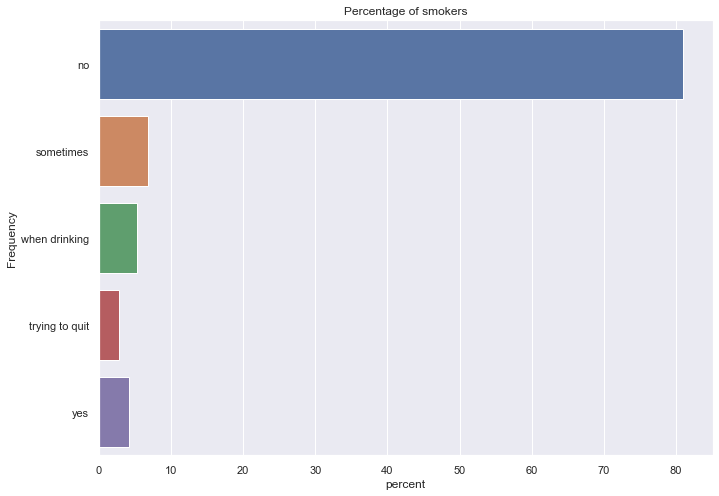

<Figure size 792x576 with 0 Axes>

In [218]:
smoke_counter = df_religion['smokes'].value_counts(normalize=True).reset_index()
smoke_counter['percent'] = smoke_counter.apply(lambda x: x['smokes'] *100, axis=1)

print(smoke_counter)

sns.set(rc={'figure.figsize':(11, 8)})
sns.barplot(data=smoke_counter, x='percent', y='index')
plt.xlabel('percent')
plt.ylabel('Frequency')
plt.title('Percentage of smokers')
plt.show()
plt.clf()

For column PETS, 59946 entries remain after 19921 NaNs deleted
The categories that have left over are: 
 ['dislikes cats', 'dislikes dogs', 'dislikes dogs and dislikes cats', 'dislikes dogs and has cats', 'dislikes dogs and likes cats', 'has cats', 'has dogs', 'has dogs and dislikes cats', 'has dogs and has cats', 'has dogs and likes cats', 'likes cats', 'likes dogs', 'likes dogs and dislikes cats', 'likes dogs and has cats', 'likes dogs and likes cats'] 

                     pet_preference     ratio    percent
0         likes dogs and likes cats  0.370119  37.011868
1                        likes dogs  0.180487  18.048720
2           likes dogs and has cats  0.107758  10.775765
3                          has dogs  0.103285  10.328545
4           has dogs and likes cats  0.058289   5.828857
5      likes dogs and dislikes cats  0.050693   5.069332
6             has dogs and has cats  0.036827   3.682698
7                          has cats  0.035128   3.512804
8                        l

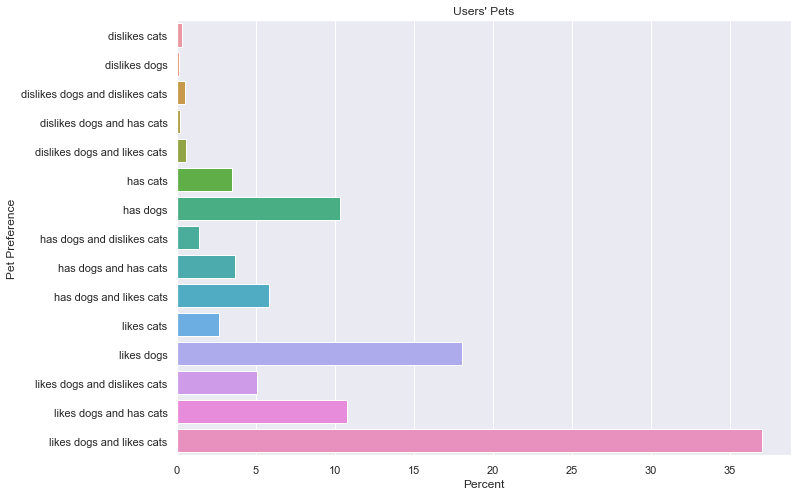

<Figure size 792x576 with 0 Axes>

In [219]:
clean_count_variables('pets')

df['pets'] = pd.Categorical(
    df['pets'], ['dislikes cats', 'dislikes dogs', 'dislikes dogs and dislikes cats',
    'dislikes dogs and has cats', 'dislikes dogs and likes cats', 'has cats',
    'has dogs', 'has dogs and dislikes cats', 'has dogs and has cats', 'has dogs and likes cats', 
    'likes cats', 'likes dogs', 'likes dogs and dislikes cats', 'likes dogs and has cats', 
    'likes dogs and likes cats'], ordered=True)

df_pets = df['pets'].value_counts(normalize=True).reset_index()
df_pets.rename(columns = {'index': 'pet_preference', 'pets': 'ratio'}, inplace=True)
df_pets['percent'] = df_pets.apply(lambda x: x['ratio']*100, axis=1)

print(df_pets)

sns.set(rc={'figure.figsize':(11, 8)})
sns.barplot(data=df_pets, x='percent', y='pet_preference')
plt.xlabel('Percent')
plt.ylabel('Pet Preference')
plt.title('Users\' Pets')
plt.show()
plt.clf()

### *Natural Language Processing*

In [220]:
df_essays = df[['essay0', 'essay1', 'essay2', 'essay3', 'essay4', 'essay5', 'essay6', 'essay7', 'essay8', 'essay9']].dropna()

print(df_essays.shape)

(29866, 10)


In [221]:
training_essays = []
test_essays = []
user_labels = []
test_labels = []
ten_users = df_essays.sample(n=10).reset_index(drop=True)

for i in range(len(ten_users)):
    rand_index = np.random.randint(10, size = 1)
    for j in range(len(ten_users.columns)):        
        if j not in rand_index:
            training_essays.append(ten_users.iloc[i, j])
            user_labels.append(i)
        else:
            test_essays.append(ten_users.iloc[i, j])
            test_labels.append(i)

bow_vectorizer = CountVectorizer()
user_vectors = bow_vectorizer.fit_transform(training_essays)

user_classifier = MultinomialNB()
user_classifier.fit(user_vectors, user_labels)

correct = 0
for i in range(10):
    test_vector = bow_vectorizer.transform([test_essays[i]])
    prediction = user_classifier.predict(test_vector)
    if prediction == i:
        print(f'For index {i} predicted {prediction}: MATCH!!!')
        correct += .1        
    else:
        print(f'For index {i} predicted {prediction}')
    
print(f'Correct ratio is: {correct}')

For index 0 predicted [8]
For index 1 predicted [7]
For index 2 predicted [8]
For index 3 predicted [2]
For index 4 predicted [8]
For index 5 predicted [8]
For index 6 predicted [7]
For index 7 predicted [8]
For index 8 predicted [8]: MATCH!!!
For index 9 predicted [8]
Correct ratio is: 0.1


### *Machine Learning*

- Here i will clean the data to fit at the models
- i will use differents machine learning models to compare them at the end

In [222]:
df.isnull().sum()

age                0
body_type       5296
diet           24395
drinks          2985
drugs          14080
education       6628
essay0          5488
essay1          7572
essay2          9638
essay3         11476
essay4         10537
essay5         10850
essay6         13771
essay7         12451
essay8         19225
essay9         12603
ethnicity       5680
height             3
income             0
job             8198
last_online        0
location           0
offspring      35561
orientation        0
pets           19921
religion       20226
sex                0
sign           11056
smokes          5512
speaks            50
status             0
dtype: int64

In [223]:
columns = ['age', 'diet', 'drinks', 'drugs', 'ethnicity', 'smokes', 'orientation', 'sign', 'religion']
labels = df[columns].dropna().copy()
print(labels.shape)

(16509, 9)


### After removing the NaN's value now lets clean our data to modeling

In [224]:
# clean age variable
labels['age'] = np.where((labels['age'] < 25), '18 to 24',
                np.where((labels['age'] < 30), '25 to 29',
                np.where((labels['age'] < 35), '30 to 34',
                np.where((labels['age'] < 40), '35 to 39',
                np.where((labels['age'] < 50), '40 to 49',
                np.where((labels['age'] < 60), '50 to 59', 'over 60'))))))

print('Age value counts:', '\n', labels['age'].value_counts(), '\n')

# clean diet variable
print('Diet value counts:', '\n', labels['diet'].value_counts(), '\n')

# clean ethnicity variable
labels['ethnicity'] = labels.apply(lambda x: (x['ethnicity'].split(','))[0], axis=1)

# clean sign variable
def check_text(string):
    if (string.__contains__('fun') | string.__contains__('but')):
        return True

labels['sign'] = labels.apply(lambda x: 'not serious' if check_text(x['sign']) else 'serious', axis=1)
print('Sign (cleaned) value counts:', '\n', labels['sign'].value_counts(), '\n')


# clean religion variable
labels['religion'] = labels['religion'].str.split().str.get(0)
print('Religion value counts:', '\n', df['religion'].value_counts(), '\n')


Age value counts: 
 25 to 29    4603
18 to 24    3360
30 to 34    3209
40 to 49    2082
35 to 39    1876
50 to 59     955
over 60      424
Name: age, dtype: int64 

Diet value counts: 
 mostly anything        8302
anything               2418
strictly anything      2230
mostly vegetarian      1546
mostly other            541
strictly vegetarian     437
strictly other          232
vegetarian              210
other                   161
mostly vegan            158
strictly vegan          119
mostly kosher            49
vegan                    47
mostly halal             30
strictly kosher          10
strictly halal            9
halal                     5
kosher                    5
Name: diet, dtype: int64 

Sign (cleaned) value counts: 
 not serious    13585
serious         2924
Name: sign, dtype: int64 

Religion value counts: 
 agnosticism                                   2724
other                                         2691
agnosticism but not too serious about it      2636
agnos

### Transforming our variable labels to dummy variables

In [225]:
# # For all except the last column
for column in columns[:-1]:
    labels = pd.get_dummies(labels, columns=[column], prefix=[column])

0         agnosticism
1         agnosticism
7        christianity
9             atheism
11       christianity
             ...     
59930           other
59936         atheism
59942     agnosticism
59943    christianity
59944     agnosticism
Name: religion, Length: 16509, dtype: object
0         agnosticism
1         agnosticism
7        christianity
9             atheism
11       christianity
             ...     
59930           other
59936         atheism
59942     agnosticism
59943    christianity
59944     agnosticism
Name: religion, Length: 16509, dtype: object


In [226]:
labels.head()

,religion,age_18 to 24,age_25 to 29,age_30 to 34,age_35 to 39,age_40 to 49,age_50 to 59,age_over 60,diet_anything,diet_halal,...,smokes_no,smokes_sometimes,smokes_trying to quit,smokes_when drinking,smokes_yes,orientation_bisexual,orientation_gay,orientation_straight,sign_not serious,sign_serious
0,agnosticism,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,1
1,agnosticism,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,1
7,christianity,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,1
9,atheism,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,1,1,0
11,christianity,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,1,0


In [231]:
# labels.religion.value_counts()

### *Solving the imbalance problem in the religion variable*

In [232]:
# splitting the religion variable
labels_maj =  labels[labels['religion'] == 'agnosticism']
labels_min1 = labels[labels['religion'] == 'other']
labels_min2 = labels[labels['religion'] == 'atheism']
labels_min3 = labels[labels['religion'] == 'christianity']
labels_min4 = labels[labels['religion'] == 'catholicism']
labels_min5 = labels[labels['religion'] == 'judaism']
labels_min6 = labels[labels['religion'] == 'buddhism']
labels_min7 = labels[labels['religion'] == 'hinduism']
labels_min8 = labels[labels['religion'] == 'islam']

# using the resample tool
maj_count = labels['religion'].value_counts()['agnosticism']
labels_min1_up = resample(labels_min1, replace=True, n_samples=(maj_count), random_state=88)
labels_min2_up = resample(labels_min2, replace=True, n_samples=(maj_count), random_state=88)
labels_min3_up = resample(labels_min3, replace=True, n_samples=(maj_count), random_state=88)
labels_min4_up = resample(labels_min4, replace=True, n_samples=(maj_count), random_state=88)
labels_min5_up = resample(labels_min5, replace=True, n_samples=(maj_count), random_state=88)
labels_min6_up = resample(labels_min6, replace=True, n_samples=(maj_count), random_state=88)
labels_min7_up = resample(labels_min7, replace=True, n_samples=(maj_count), random_state=88)
labels_min8_up = resample(labels_min8, replace=True, n_samples=(maj_count), random_state=88)

labels_upsampled = pd.concat([labels_maj, labels_min1_up, labels_min2_up, labels_min3_up, labels_min4_up, labels_min5_up, labels_min6_up, labels_min7_up, labels_min8_up,])

print(len(labels_upsampled))

Int64Index([    0,     1,     7,     9,    11,    14,    18,    19,    20,
               22,
            ...
            59918, 59920, 59925, 59928, 59929, 59930, 59936, 59942, 59943,
            59944],
           dtype='int64', length=16509)
31509


### *Splitting Data into Train-Test Sets*

In [233]:
col_length = len(labels_upsampled.columns)

X = labels_upsampled.iloc[:, 1: col_length]
y = labels_upsampled.iloc[:, 0: 1]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=0)

y_train = np.ravel(y_train)
y_test = np.ravel(y_test)

### *Logistic Regression Model*

In [235]:
logistic_model = LogisticRegression(multi_class='multinomial', max_iter=500).fit(X_train, y_train)
logistic_prediction = logistic_model.predict(X_test)


print(classification_report(y_test, logistic_prediction))

              precision    recall  f1-score   support

 agnosticism       0.23      0.07      0.11       865
     atheism       0.27      0.33      0.30       852
    buddhism       0.31      0.38      0.34       874
 catholicism       0.36      0.29      0.32       891
christianity       0.32      0.20      0.25       879
    hinduism       0.87      0.85      0.86       859
       islam       0.74      0.77      0.76       876
     judaism       0.27      0.57      0.36       923
       other       0.23      0.15      0.18       859

    accuracy                           0.40      7878
   macro avg       0.40      0.40      0.39      7878
weighted avg       0.40      0.40      0.39      7878



We get 40% of accuracy on Logistic Regression model

### *KNeighbors Classifier*

The model scores are: 
 [0.4843869002284844, 0.4546839299314547, 0.46344249809596344, 0.47105864432597105, 0.46496572734196495, 0.4676313785224676, 0.4744859101294745, 0.4732165524244732, 0.4676313785224676, 0.4675044427519675] 



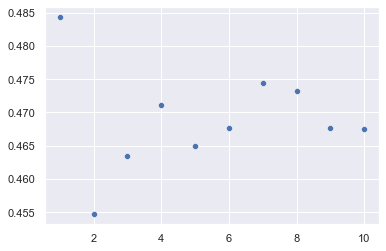

<Figure size 432x288 with 0 Axes>

In [242]:
scores = []
for i in range(1, 11):
    kneigh_model = KNeighborsClassifier(n_neighbors=i).fit(X_train, y_train)
    scores.append(kneigh_model.score(X_test, y_test))

print('The model scores are:', '\n', scores, '\n')

sns.set(rc={'figure.figsize':(6, 4)})
sns.scatterplot(x=range(1, 11), y=scores)
plt.show()
plt.clf()

In [244]:
kneigh_model = KNeighborsClassifier(n_neighbors=4).fit(X_train, y_train)
kneigh_prediction = kneigh_model.predict(X_test)

print(classification_report(y_test, kneigh_prediction))

              precision    recall  f1-score   support

 agnosticism       0.17      0.28      0.21       865
     atheism       0.30      0.32      0.31       852
    buddhism       0.47      0.60      0.53       874
 catholicism       0.38      0.38      0.38       891
christianity       0.40      0.23      0.29       879
    hinduism       0.93      0.95      0.94       859
       islam       0.91      0.93      0.92       876
     judaism       0.43      0.36      0.39       923
       other       0.35      0.20      0.26       859

    accuracy                           0.47      7878
   macro avg       0.48      0.47      0.47      7878
weighted avg       0.48      0.47      0.47      7878



We get 47% of accuracy on Kneighbors model

### *Decision Tree*

In [248]:
tree_model = DecisionTreeClassifier().fit(X_train, y_train)
tree_prediction = tree_model.predict(X_test)

print(tree_model.get_depth, '\n')

print(classification_report(y_test, tree_prediction))

<bound method BaseDecisionTree.get_depth of DecisionTreeClassifier()> 

              precision    recall  f1-score   support

 agnosticism       0.28      0.16      0.21       865
     atheism       0.43      0.39      0.41       852
    buddhism       0.47      0.70      0.56       874
 catholicism       0.53      0.39      0.45       891
christianity       0.42      0.34      0.37       879
    hinduism       0.93      0.97      0.95       859
       islam       0.95      0.93      0.94       876
     judaism       0.35      0.64      0.46       923
       other       0.51      0.31      0.39       859

    accuracy                           0.54      7878
   macro avg       0.54      0.54      0.53      7878
weighted avg       0.54      0.54      0.53      7878



54% of accuracy on Decision Tree

### *Random Forest Classifier*

High accuracy occur at 19 trees


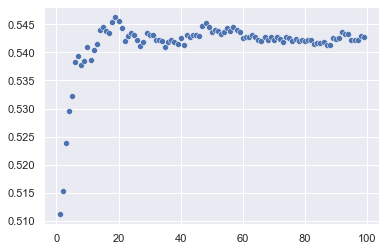

              precision    recall  f1-score   support

 agnosticism       0.31      0.14      0.19       865
     atheism       0.46      0.38      0.41       852
    buddhism       0.49      0.69      0.57       874
 catholicism       0.53      0.41      0.46       891
christianity       0.43      0.35      0.38       879
    hinduism       0.94      0.97      0.95       859
       islam       0.95      0.93      0.94       876
     judaism       0.35      0.67      0.46       923
       other       0.49      0.35      0.41       859

    accuracy                           0.55      7878
   macro avg       0.55      0.54      0.53      7878
weighted avg       0.55      0.55      0.53      7878



<Figure size 432x288 with 0 Axes>

In [252]:
scores = []

for i in range(1, 100):
    forest = RandomForestClassifier(n_estimators=i, random_state=0)
    forest.fit(X_train, y_train)
    scores.append(forest.score(X_test, y_test))

print('High accuracy occur at {} trees'.format(range(1, 100)[scores.index(max(scores))]))

sns.set(rc={'figure.figsize':(6, 4)})
sns.scatterplot(x=range(1, 100), y=scores)
plt.show()
plt.clf()
# with this graph i could see that the best number of forest is 19

forest_model = RandomForestClassifier(n_estimators=20, random_state=0).fit(X_train, y_train)
forest_predictions = forest_model.predict(X_test)

print(classification_report(y_test, forest_predictions))

Random Forest Classifier have 55%  of acurracy

In [253]:
models = [LogisticRegression(max_iter=500), KNeighborsClassifier(n_neighbors=4), DecisionTreeClassifier(max_depth=20), RandomForestClassifier(n_estimators=19, random_state=0)]

for model in models:
    model.fit(X_train, y_train)
    print('{}'.format(model.__class__.__name__))
    print('Train Score: {:.2f}%'.format(model.score(X_train, y_train)*100))
    print('Test Score: {:.2f}%'.format(model.score(X_test, y_test)*100))
    print('\n')

LogisticRegression
Train Score: 41.03%
Test Score: 40.04%


KNeighborsClassifier
Train Score: 56.15%
Test Score: 47.11%


DecisionTreeClassifier
Train Score: 59.09%
Test Score: 51.17%


RandomForestClassifier
Train Score: 63.64%
Test Score: 54.63%




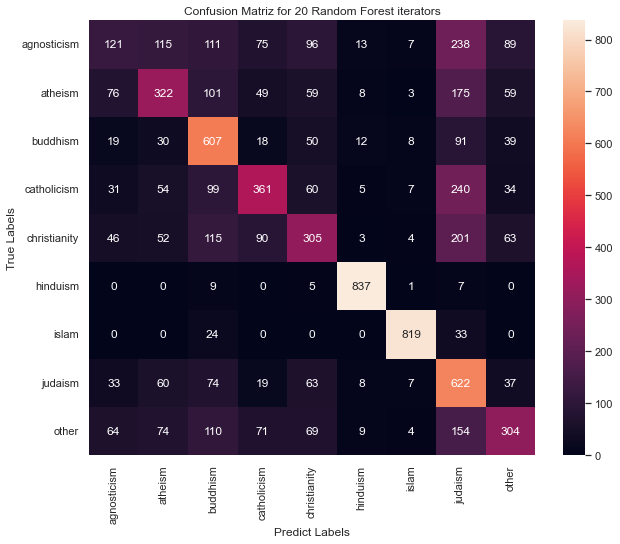

In [255]:
forest_confusion_matrix = confusion_matrix(y_test, forest_predictions)
forest_labels = forest_model.classes_

ax = plt.subplot()
sns.set(rc={'figure.figsize':(10, 8)})
sns.heatmap(forest_confusion_matrix, annot=True, ax=ax, fmt='d')
plt.xlabel('Predict Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matriz for 20 Random Forest iterators')
ax.yaxis.set_tick_params(rotation=360)
ax.xaxis.set_tick_params(rotation=90)
ax.xaxis.set_ticklabels(forest_labels); 
ax.yaxis.set_ticklabels(forest_labels);